<a href="https://colab.research.google.com/github/yoonyoung27/prac_python/blob/main/parking_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/parking_train.csv')
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

####단지 별 자료 수

In [5]:
train['단지코드'].value_counts()

C1439    48
C2132    47
C1859    40
C1790    33
C2597    32
         ..
C1768     2
C2520     1
C2340     1
C2437     1
C2188     1
Name: 단지코드, Length: 423, dtype: int64

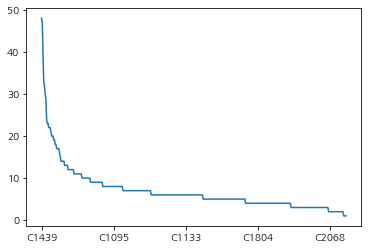

In [6]:
train['단지코드'].value_counts().plot()

####범주형 데이터 분석

In [7]:
category_cols = ['임대건물구분', '지역', '공급유형', '자격유형']

In [8]:
for col in category_cols:
    print(col + " 카운트::")
    print(train.loc[:, col].value_counts())
    print()

임대건물구분 카운트::
아파트    2390
상가      562
Name: 임대건물구분, dtype: int64

지역 카운트::
경기도        621
경상남도       369
부산광역시      328
대전광역시      266
강원도        187
충청북도       163
충청남도       158
전라남도       151
광주광역시      141
경상북도       119
전라북도       109
대구광역시      102
제주특별자치도     91
서울특별시       64
세종특별자치시     47
울산광역시       36
Name: 지역, dtype: int64

공급유형 카운트::
국민임대         1758
임대상가          562
행복주택          213
공공임대(10년)     205
영구임대          152
공공임대(50년)      31
공공임대(분납)       12
장기전세            9
공공분양            7
공공임대(5년)        3
Name: 공급유형, dtype: int64

자격유형 카운트::
A    1801
D     569
H     155
J     114
C      95
I      49
E      37
L      33
K      33
N      30
B      21
G       9
F       3
M       2
O       1
Name: 자격유형, dtype: int64



(2, 2)
(4,)


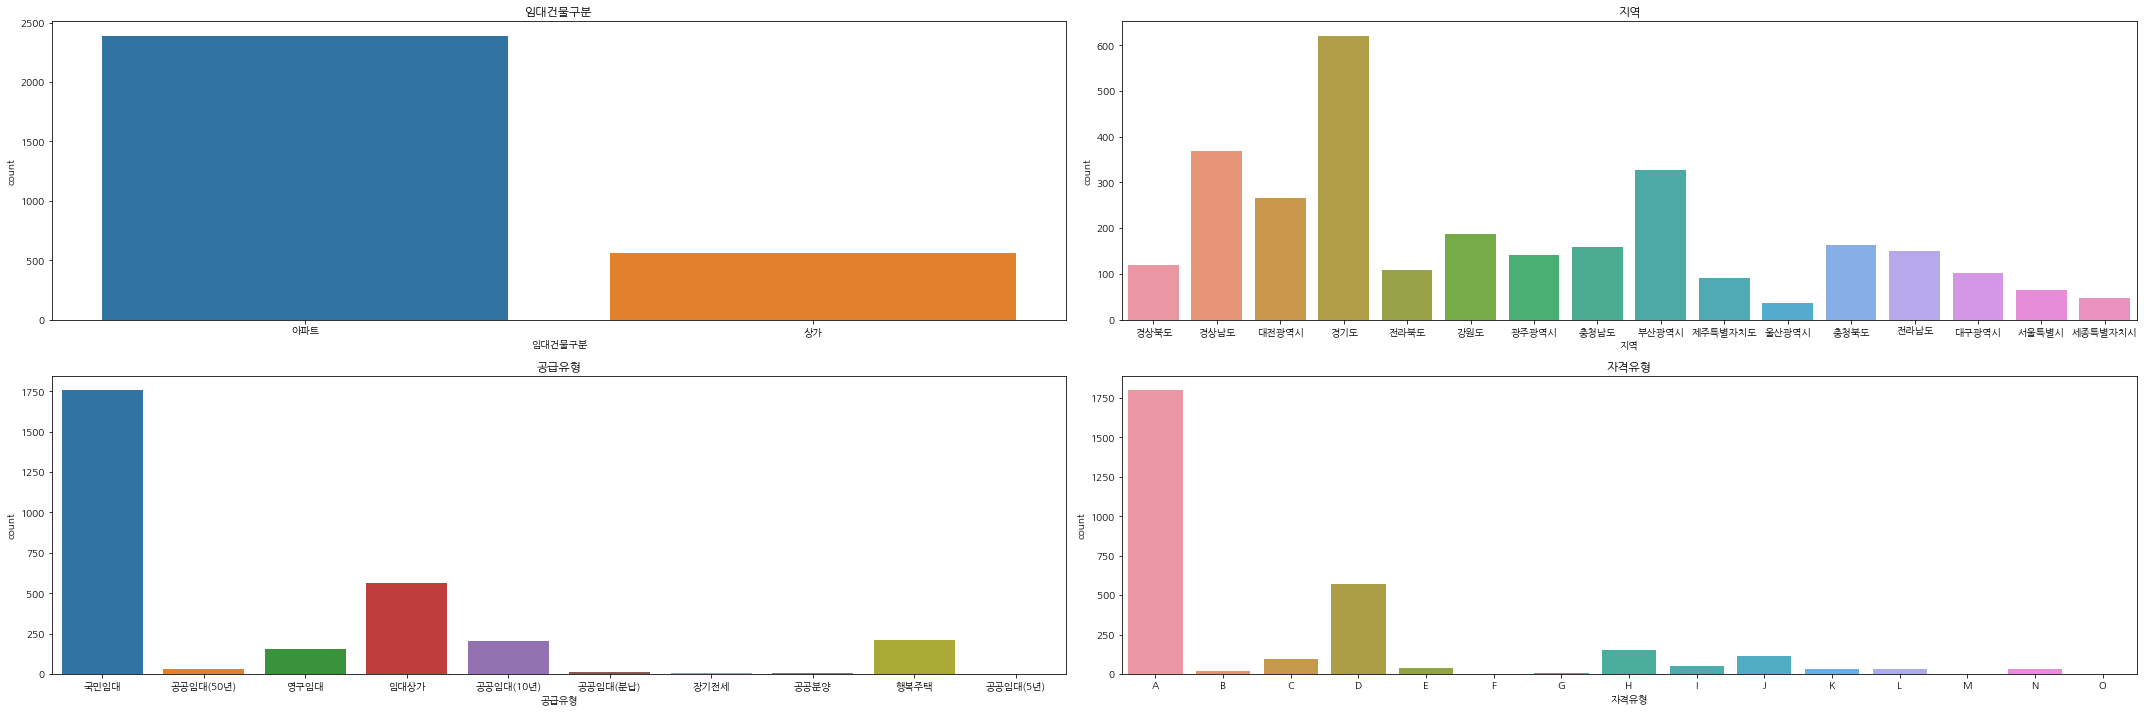

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

!apt-get update -qq
!apt-get install fonts-nanum* -qq

fm._rebuild()

plt.rc('font', family='NanumGothic')
figure, ax_list_list = plt.subplots(nrows=2, ncols=2);
figure.set_size_inches(30,10)

ax_list = ax_list_list.reshape(4)
print(ax_list_list.shape)
print(ax_list.shape)

for i in range(len(category_cols)):
    col = category_cols[i]
    sns.countplot(data=train, x=col, ax=ax_list[i])
    ax_list[i].set_title(col)

plt.tight_layout()

(2, 2)
(4,)


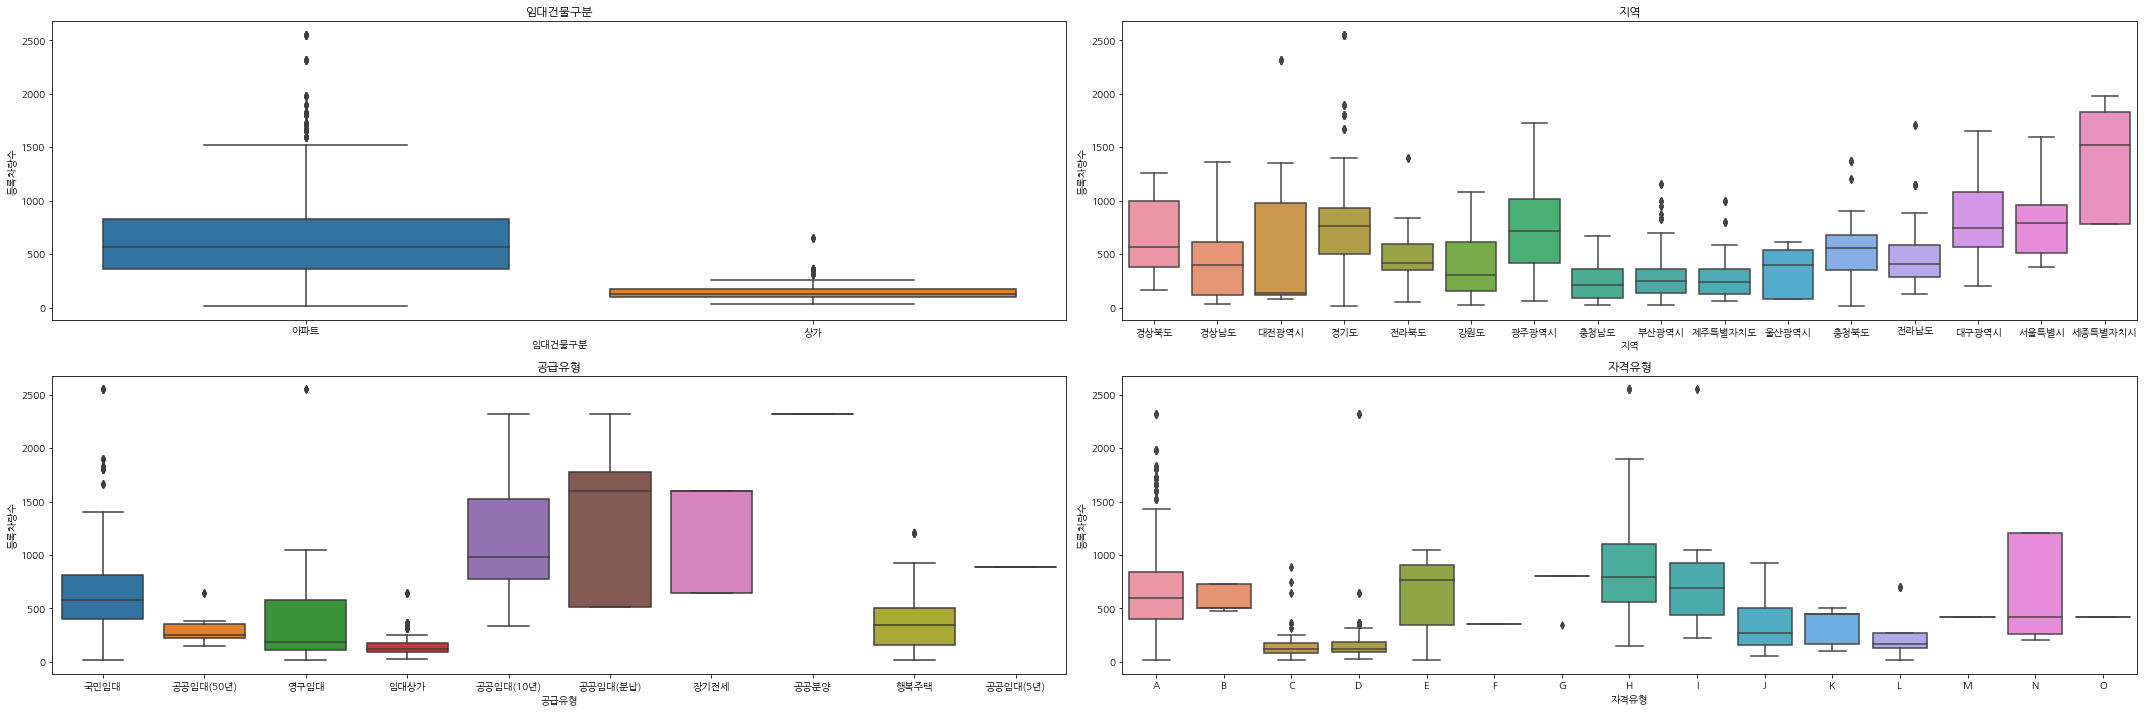

In [25]:
figure, ax_list_list = plt.subplots(nrows=2, ncols=2);
figure.set_size_inches(30,10)

ax_list = ax_list_list.reshape(4)
print(ax_list_list.shape)
print(ax_list.shape)

for i in range(len(category_cols)):
    col = category_cols[i]
    sns.boxplot(data=train, x=col, y='등록차량수', ax=ax_list[i])
    ax_list[i].set_title(col)

plt.tight_layout()

####연속형 데이터 분석

In [26]:
numerical_cols = ['총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수']